In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os

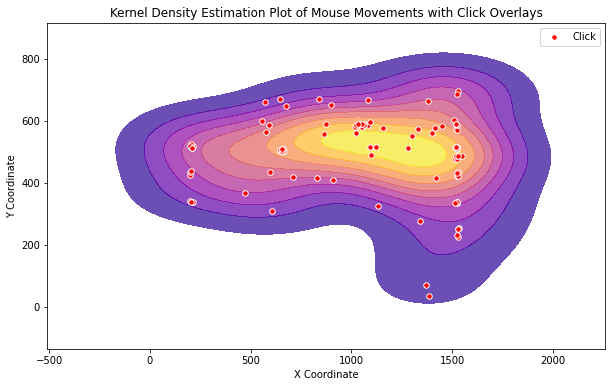

In [18]:
def extract_user_events(data):
    mousemove_events = []
    click_events = []
    
    for event in data['eventData']:
        event_type = event['eventType']
        details = event.get('details', {})
        x = details.get('x', 0)
        y = details.get('y', 0)
        if event_type == 'mousemove':
            mousemove_events.append((x, y))
        elif event_type == 'click':
            click_events.append((x, y))
    return {
        'mousemove': mousemove_events,
        'click': click_events
    }

# Directory containing the JSON files
directory_path = './extracted_logs'

# List all files in the directory
all_files = os.listdir(directory_path)

# Filter out files that are not JSON
your_json_files = [os.path.join(directory_path, file) for file in all_files if file.endswith('.json')]
all_events = {'mousemove': [], 'click': []}

for file_path in your_json_files:
    with open(file_path, 'r') as file:
        data = json.load(file)
        events = extract_user_events(data)
        all_events['mousemove'].extend(events['mousemove'])
        all_events['click'].extend(events['click'])

# Extracting coordinates for plotting
x_coords_mousemove, y_coords_mousemove = zip(*all_events['mousemove'])
x_coords_click, y_coords_click = zip(*all_events['click'])

# Plotting
plt.figure(figsize=(10, 6))
sns.kdeplot(x=x_coords_mousemove, y=y_coords_mousemove, cmap="plasma", fill=True, alpha=0.7)
plt.scatter(x_coords_click, y_coords_click, color='red', label='Click', s=30, edgecolors='w')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Kernel Density Estimation Plot of Mouse Movements with Click Overlays')

plt.savefig('density.png', format='png', dpi=300)

plt.legend()
plt.show()

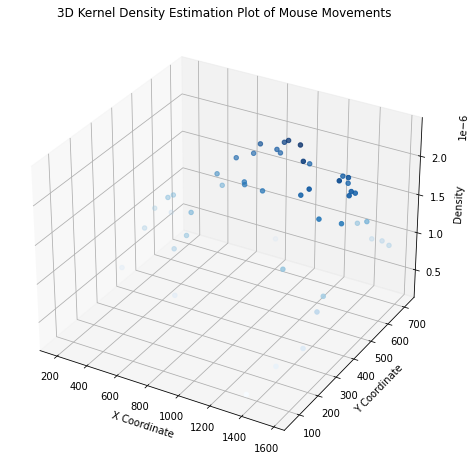

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import gaussian_kde
import numpy as np

# Calculate the point density
xy = np.vstack([x_coords_mousemove, y_coords_mousemove])
z = gaussian_kde(xy)(xy)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = np.array(x_coords_mousemove)[idx], np.array(y_coords_mousemove)[idx], z[idx]

# Plot the density
ax.scatter(x, y, z, c=z, cmap='Blues')

ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Density')
plt.title('3D Kernel Density Estimation Plot of Mouse Movements')
plt.show()

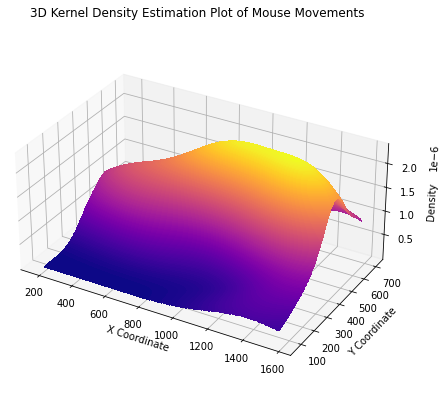

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.stats import gaussian_kde
from matplotlib.colors import LinearSegmentedColormap

# Create a grid of points
xmin, xmax = min(x_coords_mousemove), max(x_coords_mousemove)
ymin, ymax = min(y_coords_mousemove), max(y_coords_mousemove)
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([x_coords_mousemove, y_coords_mousemove])
kernel = gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)

# Plot the 3D surface
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111, projection='3d')

# Create the surface plot using a 3D contour plot
ax.contourf(X, Y, Z, levels=200, cmap='plasma')

# If you need to plot the clicks as well, you can uncomment the following line:
# ax.scatter(x_coords_click, y_coords_click, [max(Z.ravel())] * len(x_coords_click), color='red', label='Click', s=30, edgecolors='w')
ax.set_box_aspect((2.3, 1.5, 1)) 
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Density')
plt.title('3D Kernel Density Estimation Plot of Mouse Movements')
plt.savefig('3d_density.png', format='png', dpi=300)
plt.show()

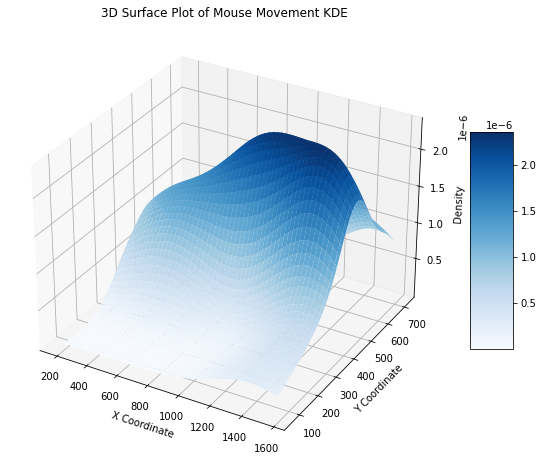

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import gaussian_kde
import numpy as np

# Create grid to evaluate KDE
xmin, xmax = min(x_coords_mousemove), max(x_coords_mousemove)
ymin, ymax = min(y_coords_mousemove), max(y_coords_mousemove)
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
kernel = gaussian_kde(xy)
f = np.reshape(kernel(positions).T, xx.shape)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the density as a surface
surf = ax.plot_surface(xx, yy, f, cmap='Blues', edgecolor='none')

ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Density')

plt.title('3D Surface Plot of Mouse Movement KDE')
plt.colorbar(surf, shrink=0.5, aspect=5)  # add a color bar which maps values to colors
plt.show()

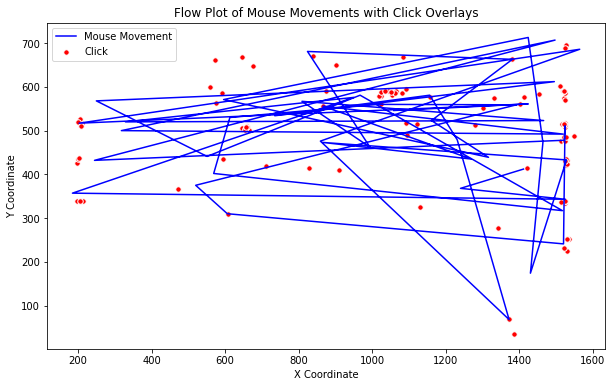

In [6]:
import matplotlib.pyplot as plt
import os
import json

# Directory containing the JSON files
directory_path = './extracted_logs'

# List all files in the directory
all_files = os.listdir(directory_path)

# Filter out files that are not JSON
json_files = [os.path.join(directory_path, file) for file in all_files if file.endswith('.json')]
all_events = {'mousemove': [], 'click': []}

for file_path in json_files:
    with open(file_path, 'r') as file:
        data = json.load(file)
        events = extract_user_events(data)
        all_events['mousemove'].extend(events['mousemove'])
        all_events['click'].extend(events['click'])

# Extracting coordinates for plotting
x_coords_mousemove, y_coords_mousemove = zip(*all_events['mousemove'])
x_coords_click, y_coords_click = zip(*all_events['click'])

# Flow Plot
plt.figure(figsize=(10, 6))
plt.plot(x_coords_mousemove, y_coords_mousemove, color='blue', label='Mouse Movement')
plt.scatter(x_coords_click, y_coords_click, color='red', label='Click', s=30, edgecolors='w')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Flow Plot of Mouse Movements with Click Overlays')
plt.legend()
plt.show()

In [7]:
import dateutil.parser
from datetime import datetime

def extract_user_events_3d(data):
    mousemove_events = []
    click_events = []
    session_start = dateutil.parser.isoparse(data['global_start_time'])
    
    for event in data['eventData']:
        event_type = event['eventType']
        timestamp = dateutil.parser.isoparse(event['timestamp'])
        time_elapsed = (timestamp - session_start).total_seconds()  # Time in seconds since session start
        details = event.get('details', {})
        x = details.get('x', 0)
        y = details.get('y', 0)
        if event_type == 'mousemove':
            mousemove_events.append((x, y, time_elapsed))
        elif event_type == 'click':
            click_events.append((x, y, time_elapsed))
    return {
        'mousemove': mousemove_events,
        'click': click_events
    }

In [8]:
all_events_3d = {'mousemove': [], 'click': []}

for file_path in your_json_files:
    with open(file_path, 'r') as file:
        data = json.load(file)
        events_3d = extract_user_events_3d(data)
        all_events_3d['mousemove'].extend(events_3d['mousemove'])
        all_events_3d['click'].extend(events_3d['click'])

# Extracting coordinates for plotting
x_coords_mousemove, y_coords_mousemove, z_coords_mousemove = zip(*all_events_3d['mousemove'])
x_coords_click, y_coords_click, z_coords_click = zip(*all_events_3d['click'])

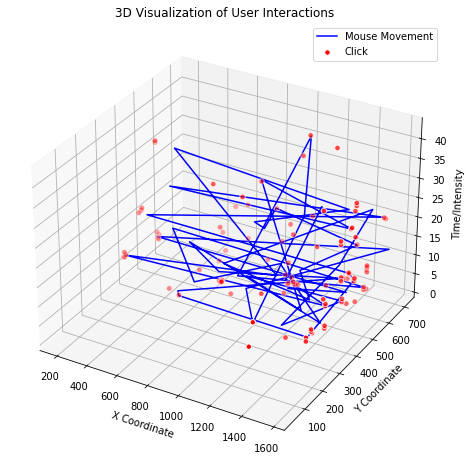

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting mouse movements
ax.plot(x_coords_mousemove, y_coords_mousemove, z_coords_mousemove, label='Mouse Movement', color='blue')

# Overlaying click events
ax.scatter(x_coords_click, y_coords_click, z_coords_click, color='red', label='Click', s=30, edgecolors='w')

ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Time/Intensity')  # Update label based on what Z-axis represents
plt.title('3D Visualization of User Interactions')
plt.legend()
plt.show()

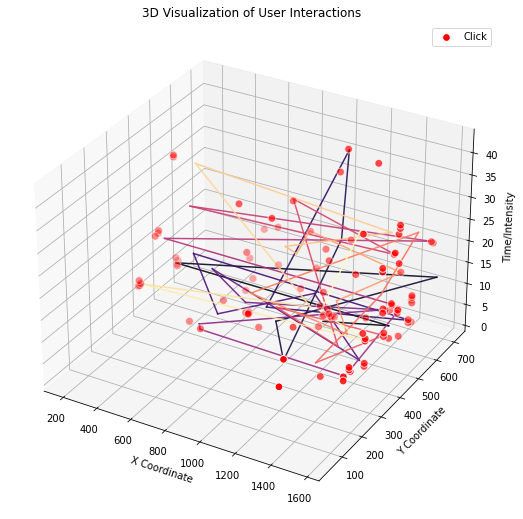

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Color mapping based on Z-axis (time or intensity)
colors = plt.cm.magma(np.linspace(0, 1, len(z_coords_mousemove)))

# Plotting mouse movements with color mapping
for i in range(1, len(x_coords_mousemove)):
    ax.plot(x_coords_mousemove[i-1:i+1], y_coords_mousemove[i-1:i+1], z_coords_mousemove[i-1:i+1], color=colors[i], alpha=0.9)

# Overlaying click events
ax.scatter(x_coords_click, y_coords_click, z_coords_click, color='red', label='Click', s=60, edgecolors='w')

ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Time/Intensity')
plt.title('3D Visualization of User Interactions')
plt.legend()
plt.show()

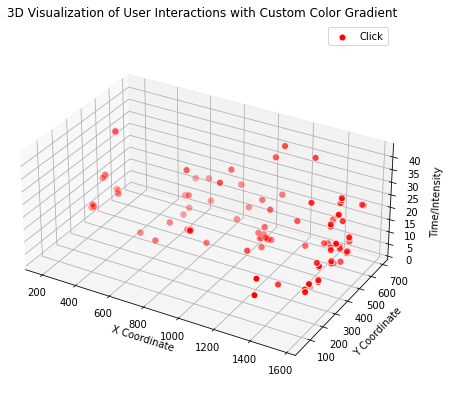

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
import numpy as np

# Define colors for the custom colormap (dark brown to orange)
cmap_colors = [(0.1,0,0.5), (0.7,0.2,0.2 ), (1,0.5,0.4)]  # RGB values
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", cmap_colors)

fig = plt.figure(figsize=(11,7))  # Width is larger than height
ax = fig.add_subplot(111, projection='3d')

# Custom color mapping
colors = custom_cmap(np.linspace(0, 1, len(z_coords_mousemove)))

# Plotting mouse movements with custom color mapping
# for i in range(1, len(x_coords_mousemove)):
#     ax.plot(x_coords_mousemove[i-1:i+1], y_coords_mousemove[i-1:i+1], z_coords_mousemove[i-1:i+1], color=colors[i], alpha=0.6)

# Overlaying click events
ax.scatter(x_coords_click, y_coords_click, z_coords_click, color='red', label='Click', s=50, edgecolors='w')

ax.set_box_aspect((2.3, 1.5, 1))  # For example, x-axis is twice as 'long' as y and z


ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Time/Intensity')
plt.title('3D Visualization of User Interactions with Custom Color Gradient')
plt.legend()
plt.savefig('user_interactions_plot.png', format='png', dpi=300)
plt.show()